## PADRONIZAÇÃO DE VALORES
### PREPROCESSAMENTO DE DADOS

#### Padronização de valores representa o ajuste numérico de dados que foram recibidos em escalas diferentes (range) para uma escala comum de referência. Assim é possível aproximar os intervalos entre valores de diferentes escalas.

### SEQUÊNCIA DE PROCESSAMENTO EM ML:
#### Aquisição dos Dados >> Tratamento dos Dados Faltantes >> Avaliação de Outliers e Registros Inconsistêntes >> Transformação de Dados >> PADRONIZAÇÃO DOS DADOS para entrada no modelo >> Definição do Modelo e Configuração de Hiperparâmetros >> Avaliação da Performance.

In [1]:
#Importações de módulos
import numpy as np

#https://github.com/LeandroTeodoroRJ/CalculoComPython/blob/master/MetodosComputacionais.py
from MetodosComputacionais import Dados

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Criando as series
min = -30
max = 70
n = list(range(min, max))    #Domínio
s1 = list(map(lambda a:a**2, n))
s2 = list(map(lambda a:3*a-45, n))
s3 = list(map(lambda a:a**3+a**2-a+3, n))

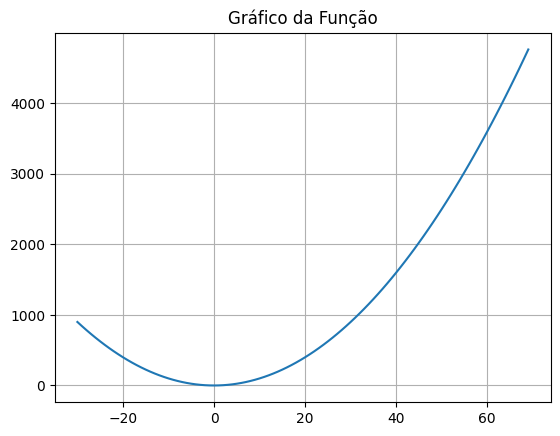

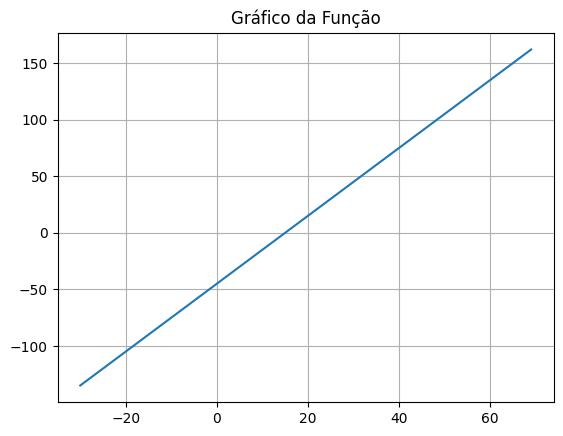

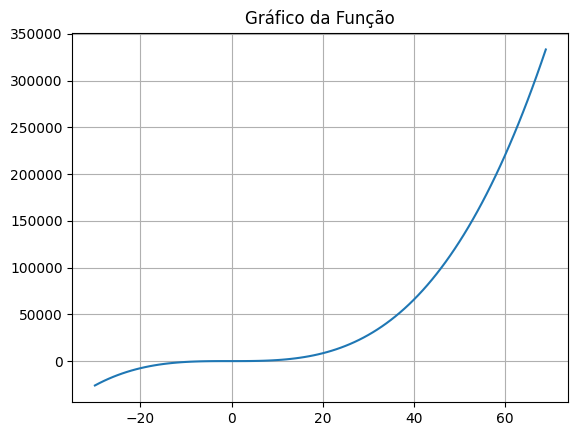

In [3]:
#Plotando o gráfico
ds1 = Dados(n, s1)
ds2 = Dados(n, s2)
ds3 = Dados(n, s3)
ds1.set_limites(min, max-1)
ds2.set_limites(min, max-1)
ds3.set_limites(min, max-1)
ds1.gera_grafico()
ds2.gera_grafico()
ds3.gera_grafico()

In [4]:
#Cast para numpy array
y = np.array([s3])    #Cast
y = y.T               #Transposição
X = np.zeros((len(s1), 2), dtype=float)
for i in range(len(s1)):
    X[i, 0] = s1[i]
    X[i, 1] = s2[i]


In [5]:
X[0:10, :]    #Primeiras 10 linhas

array([[ 900., -135.],
       [ 841., -132.],
       [ 784., -129.],
       [ 729., -126.],
       [ 676., -123.],
       [ 625., -120.],
       [ 576., -117.],
       [ 529., -114.],
       [ 484., -111.],
       [ 441., -108.]])

In [6]:
y[0:10, :]

array([[-26067],
       [-23516],
       [-21137],
       [-18924],
       [-16871],
       [-14972],
       [-13221],
       [-11612],
       [-10139],
       [ -8796]])

In [7]:
X.shape

(100, 2)

In [8]:
y.shape

(100, 1)

#### Alguns valores importantes:

In [9]:
X[:,0].min(), X[:,0].max(), X[:,0].mean(), X[:,0].std()

(0.0, 4761.0, 1213.5, 1350.0559432853145)

In [10]:
X[:,1].min(), X[:,1].max(), X[:,1].mean(), X[:,1].std()

(-135.0, 162.0, 13.5, 86.59821014316636)

In [11]:
y.min(), y.max(), y.mean(), y.std()

(-26067, 333204, 57357.0, 91104.64447381374)


### StandardScaler


### Z = (x - u) / s
##### Sendo...  Z: valor ajustado, x: valor de entrada, u: média dos valores, s: desvio padrão 

In [12]:
stdscaler = StandardScaler()
X_scaled = stdscaler.fit_transform(X)
y_scaled = stdscaler.fit_transform(y)

In [13]:
X_scaled[:,0].min(), X_scaled[:,0].max()

(-0.8988516409527368, 2.6276688885701147)

In [14]:
X_scaled[:,1].min(), X_scaled[:,1].max()

(-1.7148160424389376, 1.7148160424389376)

In [15]:
y_scaled.min(), y_scaled.max()

(-0.9156942599559632, 3.0278039236439462)

In [16]:
stdscaler.inverse_transform([[3.027]])   #Inversa de y_scaled no valor máximo

array([[333130.75882223]])

### Normalize

In [17]:
X_scaled = normalize(X, norm='l2')  #norm: l1, l2, max
y_scaled = normalize(y, norm='l2')

In [18]:
X_scaled[:,0].min(), X_scaled[:,0].max()   #Na primeira série não há valores negativos

(0.0, 1.0)

In [19]:
X_scaled[:,1].min(), X_scaled[:,1].max()

(-1.0, 0.04993761694389224)

In [20]:
y_scaled.min(), y_scaled.max()

(-1.0, 1.0)

### MinMaxScaler

### X_scaled = ( X - Xmin ) / (Xmax - Xmin)

In [21]:
mmscaler = MinMaxScaler()
X_scaled = mmscaler.fit_transform(X)
y_scaled = mmscaler.fit_transform(y)

In [22]:
X_scaled[:,0].min(), X_scaled[:,0].max()

(0.0, 0.9999999999999999)

In [23]:
X_scaled[:,1].min(), X_scaled[:,1].max()

(0.0, 1.0)

In [24]:
y_scaled.min(), y_scaled.max()

(0.0, 1.0)

In [25]:
mmscaler.inverse_transform([[1.0]])

array([[333204.]])

In [26]:
mmscaler.inverse_transform([[0]])

array([[-26067.]])

### OBS:
1) É importante observar os impactos dos outliers na padronização de dados.
2) Cheque os valor mínimos e máximo das séries antes de entrar no modelo.

### Existem outros ...
#### RobustScaler: https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/